# Sweden statistics

Public Health Agency/Folkhälsomyndigheten

* https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates 
sns.set_context('talk')

In [2]:
df1=pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx',sheet_name='Antal avlidna per dag',parse_dates=True)
df1=df1.rename(columns={'Antal_avlidna':'Cases'})
df1.dtypes

Datum_avliden    datetime64[ns]
Cases                     int64
dtype: object

In [3]:
df2=pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx',sheet_name='Antal intensivvårdade per dag',parse_dates=True)
df2=df2.rename(columns={'Antal_intensivvårdade':'ICU'})
#df2

In [4]:
df = pd.merge(df1,df2,left_on='Datum_avliden',right_on='Datum_vårdstart')
df = df.drop(columns='Datum_vårdstart')

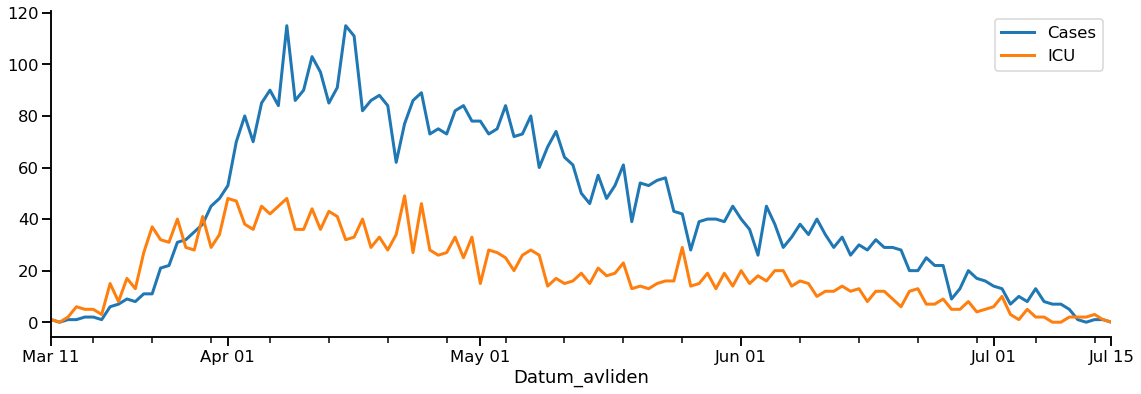

In [5]:
figure, ax = plt.subplots(1,1,figsize=(19, 6))
#ax.xaxis_date()
df.plot(x='Datum_avliden',kind='line',lw=3,ax=ax)
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
sns.despine()

In [6]:
ag=pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx',sheet_name='Totalt antal per åldersgrupp',parse_dates=True)[:-1]
ag = ag.rename(columns={'Totalt_antal_fall':'Total Cases','Totalt_antal_intensivvårdade':'Total number of intensive care units',
                        'Totalt_antal_avlidna':'Total Deaths','Åldersgrupp':'Age Group'})
ag['Age Group'] = ag['Age Group'].str.replace('Ålder_','')

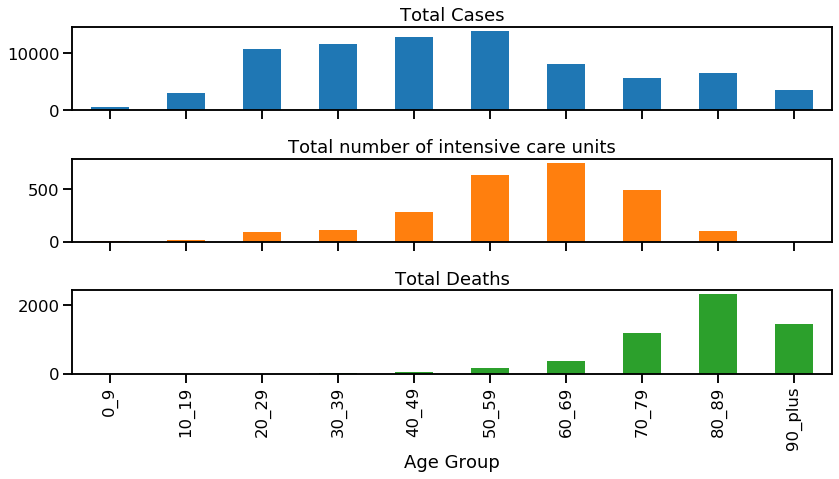

In [7]:
ag.plot('Age Group',kind='bar',figsize=(12,7),subplots=True,legend=False)
plt.tight_layout()

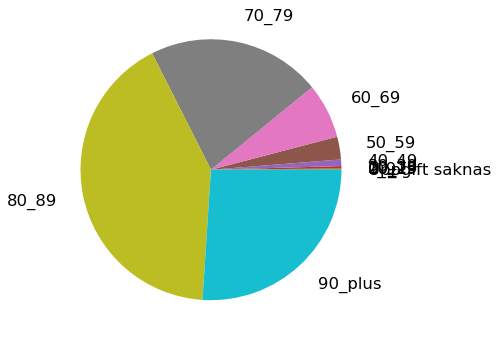

In [105]:
figure, ax = plt.subplots(1,1,figsize=(19, 6))
ax=ax.pie(ag['Total Deaths'],labels=ag['Age Group'],labeldistance=1.2)

# CSO Covid deaths Ireland

https://www.cso.ie/en/releasesandpublications/br/b-cdc/covid-19deathsandcasesseries4/

In [53]:
cso=pd.read_csv('cso_deaths.csv')
cso['cfr'] = (cso.deaths/cso.cases).round(3)
cso['perc'] = (cso.deaths/cso.deaths.sum())
cso

,age,deaths,median_age_deaths,cases,median_age_cases,cfr,perc
0,0-24,0,20,2340,21,0.000,0.000000
1,25-44,0,38,8656,35,0.000,0.000000
2,45-64,85,58,7758,53,0.011,0.060584
3,65-79,397,74,2807,73,0.141,0.282965
4,80+,921,87,3609,86,0.255,0.656450


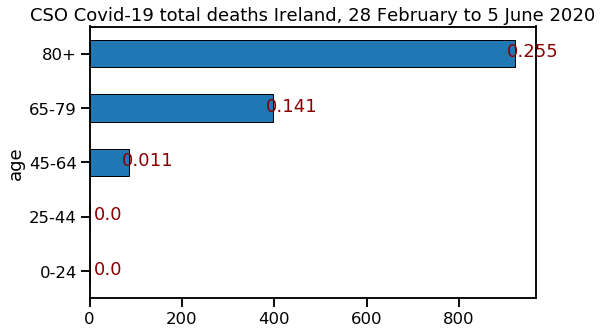

In [54]:
fig,ax=plt.subplots(1,1,figsize=(8,5))
#ax=axs.flat
cso.plot('age','deaths',kind='barh',ax=ax,legend=False,lw=1,ec='black')
ax.set_title('CSO Covid-19 total deaths Ireland, 28 February to 5 June 2020')
rects = ax.patches
labels=cso.cfr
for rect, label in zip(rects, labels):
    h = rect.get_height()
    w = rect.get_width()
    ax.text(rect.get_x()+w+40, rect.get_y()+h/4, label,
            ha='center', va='bottom', color='darkred')
plt.savefig('cso_deaths.png',dpi=130)

In [ ]:
x=df.set_index('Statistikdatum')[cols[2:]]
x
sns.heatmap(x)

In [ ]:
m = df.melt(id_vars='Statistikdatum',var_name='geo')

In [ ]:
sns.relplot(x='Statistikdatum',y='value',col='geo',col_wrap=4,kind='line',data=m,aspect=3)